In [55]:
import pandas as pd
import numpy as np
data_reduced=pd.read_csv("final_data_v3.csv")

In [56]:
data_reduced.shape

(146231, 146)

In [57]:
X=data_reduced.drop(['loan_status'],axis=1)
y=data_reduced[['loan_status']]

In [58]:
correlation_matrix=X.corr()

In [59]:
# Filter the correlation matrix to show only values greater than 0.6
filtered_corr = correlation_matrix.where(correlation_matrix > 0.6, np.nan)

# Set the diagonal values to NaN
np.fill_diagonal(filtered_corr.values, np.nan)

np.fill_diagonal(filtered_corr.values, np.nan)

# Drop rows and columns where all elements are NaN
filtered_corr = filtered_corr.dropna(how='all').dropna(axis=1, how='all')

# Melt the DataFrame to show only the non-NaN values
filtered_corr_melted = filtered_corr.stack().reset_index()
filtered_corr_melted.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(filtered_corr_melted)

              Variable 1            Variable 2  Correlation
0            installment       total_rec_prncp     0.765573
1            delinq_2yrs    num_tl_90g_dpd_24m     0.667981
2                pub_rec  pub_rec_bankruptcies     0.609783
3                pub_rec             tax_liens     0.739624
4              revol_bal      total_rev_hi_lim     0.813389
5              total_acc             num_il_tl     0.695882
6              total_acc         num_rev_accts     0.740337
7              total_acc              num_sats     0.697688
8        total_rec_prncp           installment     0.765573
9        total_rec_prncp       last_pymnt_amnt     0.659399
10       last_pymnt_amnt       total_rec_prncp     0.659399
11  last_fico_range_high   last_fico_range_low     0.841422
12   last_fico_range_low  last_fico_range_high     0.841422
13        acc_now_delinq          num_tl_30dpd     0.820706
14      total_rev_hi_lim             revol_bal     0.813389
15      total_rev_hi_lim        total_bc

In [60]:
col_2_drop=filtered_corr_melted['Variable 2'].unique()

In [61]:
col_2_drop=list(col_2_drop)

In [62]:
col_2_drop

['total_rec_prncp',
 'num_tl_90g_dpd_24m',
 'pub_rec_bankruptcies',
 'tax_liens',
 'total_rev_hi_lim',
 'num_il_tl',
 'num_rev_accts',
 'num_sats',
 'installment',
 'last_pymnt_amnt',
 'last_fico_range_low',
 'last_fico_range_high',
 'num_tl_30dpd',
 'revol_bal',
 'total_bc_limit',
 'num_tl_op_past_12m',
 'tot_hi_cred_lim',
 'percent_bc_gt_75',
 'num_bc_sats',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_actv_bc_tl',
 'num_bc_tl',
 'total_acc',
 'acc_now_delinq',
 'delinq_2yrs',
 'acc_open_past_24mths',
 'bc_util',
 'pub_rec',
 'avg_cur_bal',
 'bc_open_to_buy']

In [63]:
X_mod=X.drop(col_2_drop,axis=1)

In [64]:
X_mod.shape

(146231, 114)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (116984, 114), y_train shape: (116984, 1)
X_test shape: (29247, 114), y_test shape: (29247, 1)


In [66]:
y_test.value_counts()

loan_status
1              23909
0               5338
Name: count, dtype: int64

In [67]:
X_mod.columns

Index(['int_rate', 'annual_inc', 'dti', 'fico_range_high', 'inq_last_6mths',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'tot_coll_amt',
       ...
       'hardship_flag_N', 'disbursement_method_Cash',
       'disbursement_method_DirectPay', 'debt_settlement_flag_N',
       'debt_settlement_flag_Y', 'sector_Education',
       'sector_Finance and Banking', 'sector_Healthcare', 'sector_IT',
       'sector_Manufacturing'],
      dtype='object', length=114)

## Implementing Smote for Class imbalance

In [68]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target after SMOTE
print(f"SMOTE target distribution: {Counter(y_train_smote)}")

SMOTE target distribution: Counter({'loan_status': 1})


In [69]:
y_train.value_counts()

loan_status
1              95558
0              21426
Name: count, dtype: int64

In [70]:
y_train_smote.value_counts()

loan_status
0              95558
1              95558
Name: count, dtype: int64

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [73]:
import warnings
warnings.filterwarnings("ignore")
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('XGB', XGBClassifier()))


## Basic model for all data (No Smote)

In [74]:
for name, model in models:
    #model_name, _ = model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"{name} Train Accuracy: {accuracy_train}")
    print(f"{name} Test Accuracy: {accuracy_test}")

LR Train Accuracy: 0.9417869110305683
LR Test Accuracy: 0.9407460594248983
KNN Train Accuracy: 0.883890104629693
KNN Test Accuracy: 0.8509932642664205
CART Train Accuracy: 1.0
CART Test Accuracy: 0.8929120935480562
RF Train Accuracy: 0.9999829036449429
RF Test Accuracy: 0.9433104250008548
NB Train Accuracy: 0.9039954181768447
NB Test Accuracy: 0.8993742947994666
XGB Train Accuracy: 0.9499076796826916
XGB Test Accuracy: 0.942455636475536


## Basic Model for SMOTE Data

In [75]:
for name, model in models:
    #model_name, _ = model
    model.fit(X_train_smote, y_train_smote)
    y_pred_train = model.predict(X_train_smote)
    y_pred = model.predict(X_test)
    accuracy_train = accuracy_score(y_train_smote, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"{name} Train Accuracy: {accuracy_train}")
    print(f"{name} Test Accuracy: {accuracy_test}")

LR Train Accuracy: 0.9006153330961301
LR Test Accuracy: 0.9340787089274114
KNN Train Accuracy: 0.8885284329935745
KNN Test Accuracy: 0.690463979211543
CART Train Accuracy: 1.0
CART Test Accuracy: 0.890587068759189
RF Train Accuracy: 1.0
RF Test Accuracy: 0.9434813827059185
NB Train Accuracy: 0.893064944850248
NB Test Accuracy: 0.8961602899442678
XGB Train Accuracy: 0.9682915088218673
XGB Test Accuracy: 0.9431736588368038


## Feature Importance for Normal Data 

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

# Setting a random seed for reproducibility
random_seed = 42

# List of models to evaluate
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))


# Function to print top 20 feature importances
def print_feature_importance(model, X_train, name, top_n=20):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_names = X_mod.columns
        sorted_indices = np.argsort(importances)[::-1]
        print(f"{name} Top {top_n} Feature Importances:")
        for idx in sorted_indices[:top_n]:
            print(f"{feature_names[idx]}: {importances[idx]}")
        print()
    elif hasattr(model, "coef_"):
        importances = model.coef_[0]
        feature_names = X_mod.columns
        sorted_indices = np.argsort(importances)[::-1]
        print(f"{name} Top {top_n} Feature Importances:")
        for idx in sorted_indices[:top_n]:
            print(f"{feature_names[idx]}: {importances[idx]}")
        print()
    else:
        print(f"{name} does not support feature importance.\n")

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate classification metrics
    report = classification_report(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC-AUC score if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = "N/A"
    
    print(f"{name} Classification Report:")
    print(report)
    print(f"ROC-AUC Score: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print()
    
    # Print top 20 feature importances
    print_feature_importance(model, X_train, name, top_n=20)


LR Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      5338
           1       0.93      1.00      0.97     23909

    accuracy                           0.94     29247
   macro avg       0.96      0.84      0.89     29247
weighted avg       0.94      0.94      0.94     29247

ROC-AUC Score: 0.9215439564537207
Confusion Matrix:
[[ 3621  1717]
 [   16 23893]]

LR Top 20 Feature Importances:
debt_settlement_flag_N: 0.8539619033521313
Sentiment Score_2015: 0.2760314513497008
Sentiment Score_2012: 0.24046563684388458
Sentiment Score_2014: 0.18953936584004633
term_36 months: 0.16662967843162424
Sentiment Score_2018: 0.1392536257339524
mort_acc: 0.1319548164267872
Sentiment Score_2016: 0.12159105591813117
grade_A: 0.12087618750942909
fico_range_high: 0.11292596078418239
sub_grade_A1: 0.10780908182220504
annual_inc: 0.09935989248533511
Sentiment Score_2017: 0.09800319891834265
mths_since_recent_bc: 0.07421265007415544


## Feature Importance for SMOTE Data

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

# Setting a random seed for reproducibility
random_seed = 42

# List of models to evaluate
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))

# Function to print top 20 feature importances
def print_feature_importance(model, X_train_smote, name, top_n=20):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_names = X_mod.columns
        sorted_indices = np.argsort(importances)[::-1]
        print(f"{name} Top {top_n} Feature Importances:")
        for idx in sorted_indices[:top_n]:
            print(f"{feature_names[idx]}: {importances[idx]}")
        print()
    elif hasattr(model, "coef_"):
        importances = model.coef_[0]
        feature_names = X_mod.columns
        sorted_indices = np.argsort(importances)[::-1]
        print(f"{name} Top {top_n} Feature Importances:")
        for idx in sorted_indices[:top_n]:
            print(f"{feature_names[idx]}: {importances[idx]}")
        print()
    else:
        print(f"{name} does not support feature importance.\n")

for name, model in models:
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    # Calculate classification metrics
    report = classification_report(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC-AUC score if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = "N/A"
    
    print(f"{name} Classification Report:")
    print(report)
    print(f"ROC-AUC Score: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print()
    
    # Print top 20 feature importances
    print_feature_importance(model, X_train_smote, name, top_n=20)


LR Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      5338
           1       0.94      0.98      0.96     23909

    accuracy                           0.93     29247
   macro avg       0.92      0.85      0.88     29247
weighted avg       0.93      0.93      0.93     29247

ROC-AUC Score: 0.9213866847227234
Confusion Matrix:
[[ 3822  1516]
 [  412 23497]]

LR Top 20 Feature Importances:
debt_settlement_flag_N: 1.0940129517827417
Sentiment Score_2015: 0.3001312727801798
Sentiment Score_2012: 0.2835061834614899
Sentiment Score_2014: 0.26882036523965724
term_36 months: 0.1923170926468691
annual_inc: 0.14781641927484027
Sentiment Score_2016: 0.14392967091649556
mort_acc: 0.13894235390823823
Sentiment Score_2018: 0.13856355299365017
fico_range_high: 0.13646398659720532
mths_since_recent_bc: 0.1264643071816948
Sentiment Score_2017: 0.08955775527144003
total_il_high_credit_limit: 0.08301100591093029
Sentiment Score_

## Hyperparameter Tuning - Normal

In [80]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
warnings.filterwarnings("ignore")

# List of models and their hyperparameters to tune
models = []
models.append(('LR', LogisticRegression(), {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}))
models.append(('KNN', KNeighborsClassifier(), {'n_neighbors': np.arange(5, 35, 5), 'weights': ['uniform', 'distance']}))
models.append(('CART', DecisionTreeClassifier(), {'max_depth': np.arange(5, 25, 5), 'min_samples_split': np.arange(5, 25, 5)}))
models.append(('RF', RandomForestClassifier(), {'n_estimators': np.arange(5, 25, 5), 'max_features': ['auto', 'sqrt', 'log2']}))
models.append(('NB', GaussianNB(), {}))  # GaussianNB doesn't have hyperparameters to tune
models.append(('XGB', XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}))


# Iterate over each model, perform hyperparameter tuning, and evaluate
for name, model, params in models:
    if params:
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        # If there are no hyperparameters to tune
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = "N/A"
    
    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    
    # Fit the best model on the full training data
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    # Calculate classification metrics
    report = classification_report(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC-AUC score if the model supports predict_proba
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = "N/A"
    
    print(f"{name} Classification Report:")
    print(report)
    print(f"Cross-Validation ROC-AUC Score: {mean_cv_score} ± {std_cv_score}")
    print(f"Test ROC-AUC Score: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Model Params{best_params}")
    print()


LR Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81      5338
           1       0.93      1.00      0.97     23909

    accuracy                           0.94     29247
   macro avg       0.97      0.84      0.89     29247
weighted avg       0.95      0.94      0.94     29247

Cross-Validation ROC-AUC Score: 0.922411075427851 ± 0.0011468748662267338
Test ROC-AUC Score: 0.922507371172145
Confusion Matrix:
[[ 3669  1669]
 [   16 23893]]
Model Params{'C': 100, 'solver': 'liblinear'}

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.24      0.38      5338
           1       0.85      1.00      0.92     23909

    accuracy                           0.86     29247
   macro avg       0.89      0.62      0.65     29247
weighted avg       0.87      0.86      0.82     29247

Cross-Validation ROC-AUC Score: 0.8024063610250123 ± 0.003677480961662779
Test ROC-AU

## Hyperparameter Tuning - With Smote

In [82]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
warnings.filterwarnings("ignore")

# List of models and their hyperparameters to tune
models = []
models.append(('LR', LogisticRegression(), {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}))
models.append(('KNN', KNeighborsClassifier(), {'n_neighbors': np.arange(5, 35, 5), 'weights': ['uniform', 'distance']}))
models.append(('CART', DecisionTreeClassifier(), {'max_depth': np.arange(5, 25, 5), 'min_samples_split': np.arange(5, 25, 5)}))
models.append(('RF', RandomForestClassifier(), {'n_estimators': np.arange(5, 25, 5), 'max_features': ['auto', 'sqrt', 'log2']}))
models.append(('NB', GaussianNB(), {}))  # GaussianNB doesn't have hyperparameters to tune
models.append(('XGB', XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}))


# Iterate over each model, perform hyperparameter tuning, and evaluate
for name, model, params in models:
    if params:
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='roc_auc')
        grid_search.fit(X_train_smote, y_train_smote)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        # If there are no hyperparameters to tune
        best_model = model
        best_model.fit(X_train_smote, y_train_smote)
        best_params = "N/A"
    
    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    
    # Fit the best model on the full training data
    best_model.fit(X_train_smote, y_train_smote)
    y_pred = best_model.predict(X_test)
    
    # Calculate classification metrics
    report = classification_report(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC-AUC score if the model supports predict_proba
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = "N/A"
    
    print(f"{name} Classification Report:")
    print(report)
    print(f"Cross-Validation ROC-AUC Score: {mean_cv_score} ± {std_cv_score}")
    print(f"Test ROC-AUC Score: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Model Params{best_params}")
    print()

LR Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      5338
           1       0.94      0.98      0.96     23909

    accuracy                           0.94     29247
   macro avg       0.92      0.85      0.88     29247
weighted avg       0.93      0.94      0.93     29247

Cross-Validation ROC-AUC Score: 0.9551534406761902 ± 0.017164531832467366
Test ROC-AUC Score: 0.921732405158494
Confusion Matrix:
[[ 3830  1508]
 [  379 23530]]
Model Params{'C': 100, 'solver': 'lbfgs'}

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.71      0.45      5338
           1       0.91      0.68      0.78     23909

    accuracy                           0.68     29247
   macro avg       0.62      0.69      0.61     29247
weighted avg       0.80      0.68      0.72     29247

Cross-Validation ROC-AUC Score: 0.9596377069762545 ± 0.01019308588037058
Test ROC-AUC Sco

## Deep Learning 

In [83]:
import tensorflow as tf
from tensorflow import keras

In [84]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[114]),
keras.layers.Dense(1000, activation="relu"),
keras.layers.Dense(450, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1, activation="softmax")
])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data = scaler.fit_transform(X_train_smote)
val_data = scaler.transform(X_test)#train_data

In [86]:
train_labels_mc = y_train_smote
val_labels_mc = y_test

In [87]:
# Since it is binary class classification categorical crossentropy and accuracy as metric is utilized to compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy",
optimizer=opt,
metrics=["accuracy"])

In [88]:
history = model.fit(train_data, train_labels_mc, epochs=100, validation_data=(val_data, val_labels_mc), verbose=1)# Turn verbose=1 to printing epochs

Epoch 1/100


5973/5973 [==============================] - 80s 13ms/step - loss: 0.3634 - accuracy: 0.5000 - val_loss: 0.3447 - val_accuracy: 0.8175
Epoch 2/100
5973/5973 [==============================] - 84s 14ms/step - loss: 0.3440 - accuracy: 0.5000 - val_loss: 0.4531 - val_accuracy: 0.8175
Epoch 3/100
5973/5973 [==============================] - 80s 13ms/step - loss: 0.3683 - accuracy: 0.5000 - val_loss: 0.2656 - val_accuracy: 0.8175
Epoch 4/100
5973/5973 [==============================] - 75s 13ms/step - loss: 0.3352 - accuracy: 0.5000 - val_loss: 0.3579 - val_accuracy: 0.8175
Epoch 5/100
5973/5973 [==============================] - 72s 12ms/step - loss: 0.4395 - accuracy: 0.5000 - val_loss: 0.3890 - val_accuracy: 0.8175
Epoch 6/100
5973/5973 [==============================] - 76s 13ms/step - loss: 0.4565 - accuracy: 0.5000 - val_loss: 0.4138 - val_accuracy: 0.8175
Epoch 7/100
5973/5973 [==============================] - 82s 14ms/step - loss: 0.4933 - accuracy: 0.5000 - val_loss:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



5973/5973 [==============================] - 82s 14ms/step - loss: 0.4567 - accuracy: 0.5000 - val_loss: 0.3670 - val_accuracy: 0.8175
Epoch 49/100
5973/5973 [==============================] - 79s 13ms/step - loss: 0.4342 - accuracy: 0.5000 - val_loss: 0.3679 - val_accuracy: 0.8175
Epoch 50/100
5973/5973 [==============================] - 83s 14ms/step - loss: 0.4764 - accuracy: 0.5000 - val_loss: 0.4601 - val_accuracy: 0.8175
Epoch 51/100
5973/5973 [==============================] - 86s 14ms/step - loss: 0.4781 - accuracy: 0.5000 - val_loss: 0.4452 - val_accuracy: 0.8175
Epoch 52/100
5973/5973 [==============================] - 86s 14ms/step - loss: 0.5225 - accuracy: 0.5000 - val_loss: 0.3747 - val_accuracy: 0.8175
Epoch 53/100
5973/5973 [==============================] - 78s 13ms/step - loss: 0.4280 - accuracy: 0.5000 - val_loss: 0.3917 - val_accuracy: 0.8175
Epoch 54/100
5973/5973 [==============================] - 78s 13ms/step - loss: 0.4879 - accuracy: 0.5000 - val_loss: 0.3902 

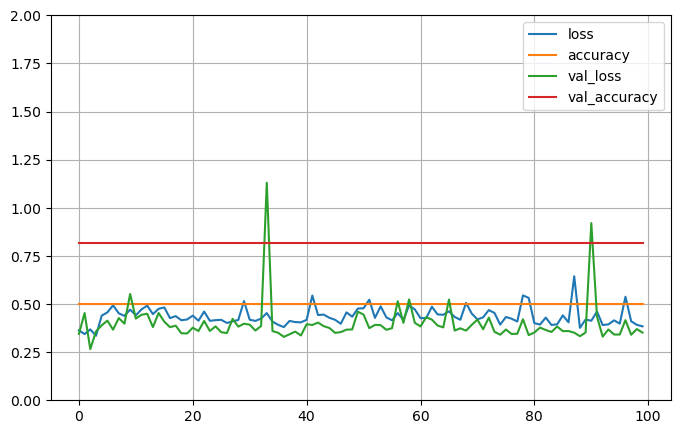

In [89]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [90]:
import numpy as np
from sklearn.metrics import classification_report

# Train your model (already done)
#history = model.fit(train_data, train_labels_mc, epochs=100, validation_data=(val_data, val_labels_mc), verbose=1)

# Make predictions on the validation set
predictions = model.predict(val_data)

# Convert predictions to binary class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Generate and print the classification report
report = classification_report(val_labels, predicted_labels, target_names=['Class 0', 'Class 1'])
print(report)


914/914 [==============================] - 5s 5ms/step


NameError: name 'val_labels' is not defined